In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
import datetime
import plotly.express as px
import plotly.graph_objects as go
import copy
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
warnings.filterwarnings('ignore')

# 导入数据/Read the datasets

In [2]:
nCoV_data = pd.read_csv("./Data/2019_nCoV_data.csv")
confirmed_data = pd.read_csv("./Data/time_series_2019_ncov_confirmed.csv")
death_data = pd.read_csv("./Data/time_series_2019_ncov_deaths.csv")
recovered_data = pd.read_csv("./Data/time_series_2019_ncov_recovered.csv")

# 观察数据/Preview over the datasets 

In [3]:
nCoV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 8 columns):
Sno               1569 non-null int64
Date              1569 non-null object
Province/State    1151 non-null object
Country           1569 non-null object
Last Update       1569 non-null object
Confirmed         1569 non-null float64
Deaths            1569 non-null float64
Recovered         1569 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 98.1+ KB


In [4]:
nCoV_data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


- 可以发现Province/State这项存在缺失值
- There are missing values in the Province/State

In [5]:
confirmed_data.head(10)

,Province/State,Country/Region,Lat,Long,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,...,02/05/20 9:00,02/05/20 23:00,02/06/20 9:00,02/06/20 14:20,02/07/20 20:13,02/07/20 22:50,02/08/20 22:04,02/08/20 23:04,02/09/20 10:30,02/09/20 23:20
0,Anhui,Mainland China,31.82571,117.2264,NaN,1.0,9.0,15.0,15.0,39.0,...,530.0,591.0,591.0,591.0,665,733,733,779,779,830
1,Beijing,Mainland China,40.18238,116.4142,10.0,14.0,22.0,26.0,36.0,36.0,...,253.0,274.0,274.0,274.0,297,315,315,326,326,337
2,Chongqing,Mainland China,30.05718,107.8740,5.0,6.0,9.0,27.0,27.0,57.0,...,376.0,389.0,400.0,400.0,415,426,428,446,450,468
3,Fujian,Mainland China,26.07783,117.9895,NaN,1.0,5.0,5.0,10.0,10.0,...,205.0,215.0,215.0,215.0,224,239,239,250,250,261
4,Gansu,Mainland China,36.06110,103.8343,NaN,NaN,2.0,2.0,2.0,4.0,...,57.0,62.0,62.0,62.0,67,71,79,79,79,83
5,Guangdong,Mainland China,23.33841,113.4220,17.0,26.0,32.0,53.0,53.0,78.0,...,895.0,944.0,970.0,970.0,1034,1075,1095,1120,1131,1151
6,Guangxi,Mainland China,23.82908,108.7881,NaN,2.0,5.0,13.0,23.0,23.0,...,150.0,168.0,168.0,168.0,172,183,183,195,195,210
7,Guizhou,Mainland China,26.81536,106.8748,NaN,1.0,3.0,3.0,3.0,4.0,...,64.0,69.0,71.0,71.0,81,89,89,96,99,109
8,Hainan,Mainland China,19.19673,109.7455,NaN,4.0,5.0,8.0,8.0,17.0,...,91.0,100.0,106.0,106.0,117,124,124,128,131,136
9,Hebei,Mainland China,38.04280,114.5149,NaN,1.0,1.0,2.0,2.0,8.0,...,135.0,157.0,157.0,157.0,172,195,195,206,206,218


In [6]:
recovered_data[:10]

,Province/State,Country/Region,Lat,Long,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,...,02/05/20 9:00,02/05/20 23:00,02/06/20 9:00,02/06/20 14:20,02/07/20 20:13,02/07/20 22:50,02/08/20 10:24,02/08/20 23:04,02/09/20 10:30,02/09/20 23:20
0,Anhui,Mainland China,31.82571,117.2264,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,23.0,34.0,34.0,47.0,47.0,59,59,72,73
1,Beijing,Mainland China,40.18238,116.4142,NaN,NaN,NaN,NaN,1.0,1.0,...,24.0,31.0,31.0,31.0,33.0,34.0,34,37,37,44
2,Chongqing,Mainland China,30.05718,107.8740,NaN,NaN,NaN,NaN,NaN,NaN,...,15.0,15.0,24.0,24.0,31.0,31.0,39,39,50,51
3,Fujian,Mainland China,26.07783,117.9895,NaN,NaN,NaN,NaN,NaN,NaN,...,11.0,11.0,14.0,14.0,20.0,20.0,24,26,35,35
4,Gansu,Mainland China,36.06110,103.8343,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,6.0,6.0,6.0,9.0,9.0,12,12,15,16
5,Guangdong,Mainland China,23.33841,113.4220,NaN,NaN,2.0,2.0,2.0,2.0,...,49.0,49.0,69.0,69.0,88.0,97.0,112,125,141,147
6,Guangxi,Mainland China,23.82908,108.7881,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,14.0,14.0,14.0,17.0,17.0,17,18,18,18
7,Guizhou,Mainland China,26.81536,106.8748,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,6.0,6.0,6.0,6.0,6.0,7,7,7,7
8,Hainan,Mainland China,19.19673,109.7455,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,5.0,8.0,8.0,10.0,11.0,14,15,19,19
9,Hebei,Mainland China,38.04280,114.5149,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,7.0,13.0,13.0,22.0,25.0,30,30,34,35


In [7]:
death_data.head()

,Province/State,Country/Region,Lat,Long,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,...,02/05/20 9:00,02/05/20 23:00,02/06/20 9:00,02/06/20 14:20,02/07/20 20:13,02/07/20 22:50,02/08/20 10:24,02/08/20 23:04,02/09/20 10:30,02/09/20 23:20
0,Anhui,Mainland China,31.82571,117.2264,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,3
1,Beijing,Mainland China,40.18238,116.4142,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2,2,2,2
2,Chongqing,Mainland China,30.05718,107.8740,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2,2,2,2
3,Fujian,Mainland China,26.07783,117.9895,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,Gansu,Mainland China,36.06110,103.8343,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1,1,1,2


# 数据处理/Data Process
* nCoV_data

In [8]:
nCoV_data['Date'] = nCoV_data['Date'].apply(pd.to_datetime)
nCoV_data[''] = nCoV_data['Date'].apply(pd.to_datetime)

In [9]:
nCoV_data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,
0,1,2020-01-22 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0,2020-01-22 12:00:00
1,2,2020-01-22 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0,2020-01-22 12:00:00
2,3,2020-01-22 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0,2020-01-22 12:00:00
3,4,2020-01-22 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0,2020-01-22 12:00:00
4,5,2020-01-22 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0,2020-01-22 12:00:00


In [10]:
nCoV_data.drop(['Sno'],axis=1,inplace=True)

In [11]:
nCoV_data.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,
0,2020-01-22 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0,2020-01-22 12:00:00
1,2020-01-22 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0,2020-01-22 12:00:00
2,2020-01-22 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0,2020-01-22 12:00:00
3,2020-01-22 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0,2020-01-22 12:00:00
4,2020-01-22 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0,2020-01-22 12:00:00


In [12]:
nCoV_data['Country'].replace({'Mainland China':'China','Hong Kong':'China',
                         'Macau':'China','Taiwan':'China'},inplace=True)
countries = nCoV_data['Country'].unique().tolist()
print(countries)
print("\nTotal countries affected by virus: ",len(countries))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium', 'Others', 'Egypt']

Total countries affected by virus:  30


In [13]:
d = nCoV_data['Date'][-1:].astype('str')
year = int(d.values[0].split('-')[0])
month = int(d.values[0].split('-')[1])
day = int(d.values[0].split('-')[2].split()[0])

data_latest = nCoV_data[nCoV_data['Date'] > pd.Timestamp(datetime.date(year,month,day))]
data_latest.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,
1494,2020-02-15 22:00:00,Hubei,China,2020-02-15T23:13:05,56249.0,1596.0,5623.0,2020-02-15 22:00:00
1495,2020-02-15 22:00:00,Guangdong,China,2020-02-15T14:03:04,1294.0,2.0,410.0,2020-02-15 22:00:00
1496,2020-02-15 22:00:00,Henan,China,2020-02-15T12:13:08,1212.0,13.0,391.0,2020-02-15 22:00:00
1497,2020-02-15 22:00:00,Zhejiang,China,2020-02-15T11:23:17,1162.0,0.0,428.0,2020-02-15 22:00:00
1498,2020-02-15 22:00:00,Hunan,China,2020-02-15T13:03:04,1001.0,2.0,425.0,2020-02-15 22:00:00


In [14]:
print('Globally Confirmed Cases: ',data_latest['Confirmed'].sum())
print('Global Deaths: ',data_latest['Deaths'].sum())
print('Globally Recovered Cases: ',data_latest['Recovered'].sum())

Globally Confirmed Cases:  69032.0
Global Deaths:  1666.0
Globally Recovered Cases:  9395.0


In [15]:
data_latest.groupby(['Country','Province/State']).sum()

Confirmed  Deaths  Recovered
Country   Province/State                                            
Australia New South Wales                     4.0     0.0        4.0
          Queensland                          5.0     0.0        0.0
          South Australia                     2.0     0.0        0.0
          Victoria                            4.0     0.0        4.0
Canada    British Columbia                    4.0     0.0        0.0
          London, ON                          1.0     0.0        1.0
          Toronto, ON                         2.0     0.0        0.0
China     Anhui                             950.0     6.0      221.0
          Beijing                           375.0     4.0       98.0
          Chongqing                         544.0     5.0      184.0
          Fujian                            285.0     0.0       71.0
          Gansu                              90.0     2.0       49.0
          Guangdong                        1294.0     2.0      410.0
          Guangxi                           235.0     2.0       44.0
          Guizhou                           143.0     1.0       41.0
          Hainan                            162.0     4.0       39.0
          Hebei                             291.0     3.0      101.0
          Heilongjiang                      425.0    11.0       68.0
          Henan                            1212.0    13.0      391.0
          Hong Kong                          56.0     1.0        1.0
          Hubei                           56249.0  1596.0     5623.0
          Hunan                            1001.0     2.0      425.0
          Inner Mongolia                     68.0     0.0        7.0
          Jiangsu                           604.0     0.0      186.0
          Jiangxi                           913.0     1.0      210.0
          Jilin                              88.0     1.0       26.0
          Liaoning                          119.0     1.0       31.0
          Macau                              10.0     0.0        3.0
          Ningxia                            70.0     0.0       33.0
          Qinghai                            18.0     0.0       13.0
          Shaanxi                           232.0     0.0       60.0
          Shandong                          532.0     2.0      156.0
          Shanghai                          326.0     1.0      124.0
          Shanxi                            128.0     0.0       46.0
          Sichuan                           470.0     1.0      119.0
          Taiwan                             18.0     0.0        2.0
          Tianjin                           122.0     3.0       37.0
          Tibet                               1.0     0.0        1.0
          Xinjiang                           70.0     1.0       10.0
          Yunnan                            168.0     0.0       42.0
          Zhejiang                         1162.0     0.0      428.0
Others    Diamond Princess cruise ship      285.0     0.0        0.0
US        Boston, MA                          1.0     0.0        0.0
          Chicago, IL                         2.0     0.0        2.0
          Los Angeles, CA                     1.0     0.0        0.0
          Madison, WI                         1.0     0.0        0.0
          Orange, CA                          1.0     0.0        0.0
          San Antonio, TX                     1.0     0.0        0.0
          San Benito, CA                      2.0     0.0        0.0
          San Diego County, CA                2.0     0.0        0.0
          Santa Clara, CA                     2.0     0.0        0.0
          Seattle, WA                         1.0     0.0        1.0
          Tempe, AZ                           1.0     0.0        0.0

In [16]:
data_latest.groupby('Country')['Deaths'].sum().sort_values(ascending=False)[:5]

Country
China          1663.0
France            1.0
Philippines       1.0
Japan             1.0
Vietnam           0.0
Name: Deaths, dtype: float64

In [17]:
data_latest.groupby('Country')['Recovered'].sum().sort_values(ascending=False)[:5]

Country
China          9300.0
Singapore        18.0
Japan            12.0
Thailand         12.0
South Korea       9.0
Name: Recovered, dtype: float64

In [18]:
data_latest.groupby('Country')['Confirmed'].sum().sort_values(ascending=False)[:5]

Country
China        68431.0
Others         285.0
Singapore       72.0
Japan           43.0
Thailand        33.0
Name: Confirmed, dtype: float64

- confirmed_data
- recovered_data
- death_data

In [19]:
confirmed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 40 columns):
Province/State    51 non-null object
Country/Region    72 non-null object
Lat               72 non-null float64
Long              72 non-null float64
1/21/20 22:00     16 non-null float64
1/22/20 12:00     29 non-null float64
1/23/20 12:00     37 non-null float64
1/24/20 0:00      38 non-null float64
1/24/20 12:00     40 non-null float64
1/25/20 0:00      42 non-null float64
1/25/20 12:00     43 non-null float64
1/25/20 22:00     43 non-null float64
1/26/20 11:00     49 non-null float64
1/26/20 23:00     49 non-null float64
1/27/20 9:00      50 non-null float64
1/27/20 19:00     51 non-null float64
1/27/20 20:30     52 non-null float64
1/28/20 13:00     53 non-null float64
1/28/20 18:00     53 non-null float64
1/28/20 23:00     53 non-null float64
1/29/20 13:30     56 non-null float64
1/29/20 14:30     55 non-null float64
1/29/20 21:00     57 non-null float64
1/30/20 11:00     59 non-

### 数据只截止到2020-02-09/ from 2020-01-21 to 2020-02-09

In [20]:
confirmed_time_cols = confirmed_data.columns.tolist()[4:]
death_time_cols = death_data.columns.tolist()[4:]
recovered_time_cols = recovered_data.columns.tolist()[4:]

## 以时间顺序，大体观察确诊/死亡/痊愈情况 
## Overview over the Confirmed/Death/Recovered Cases by time 

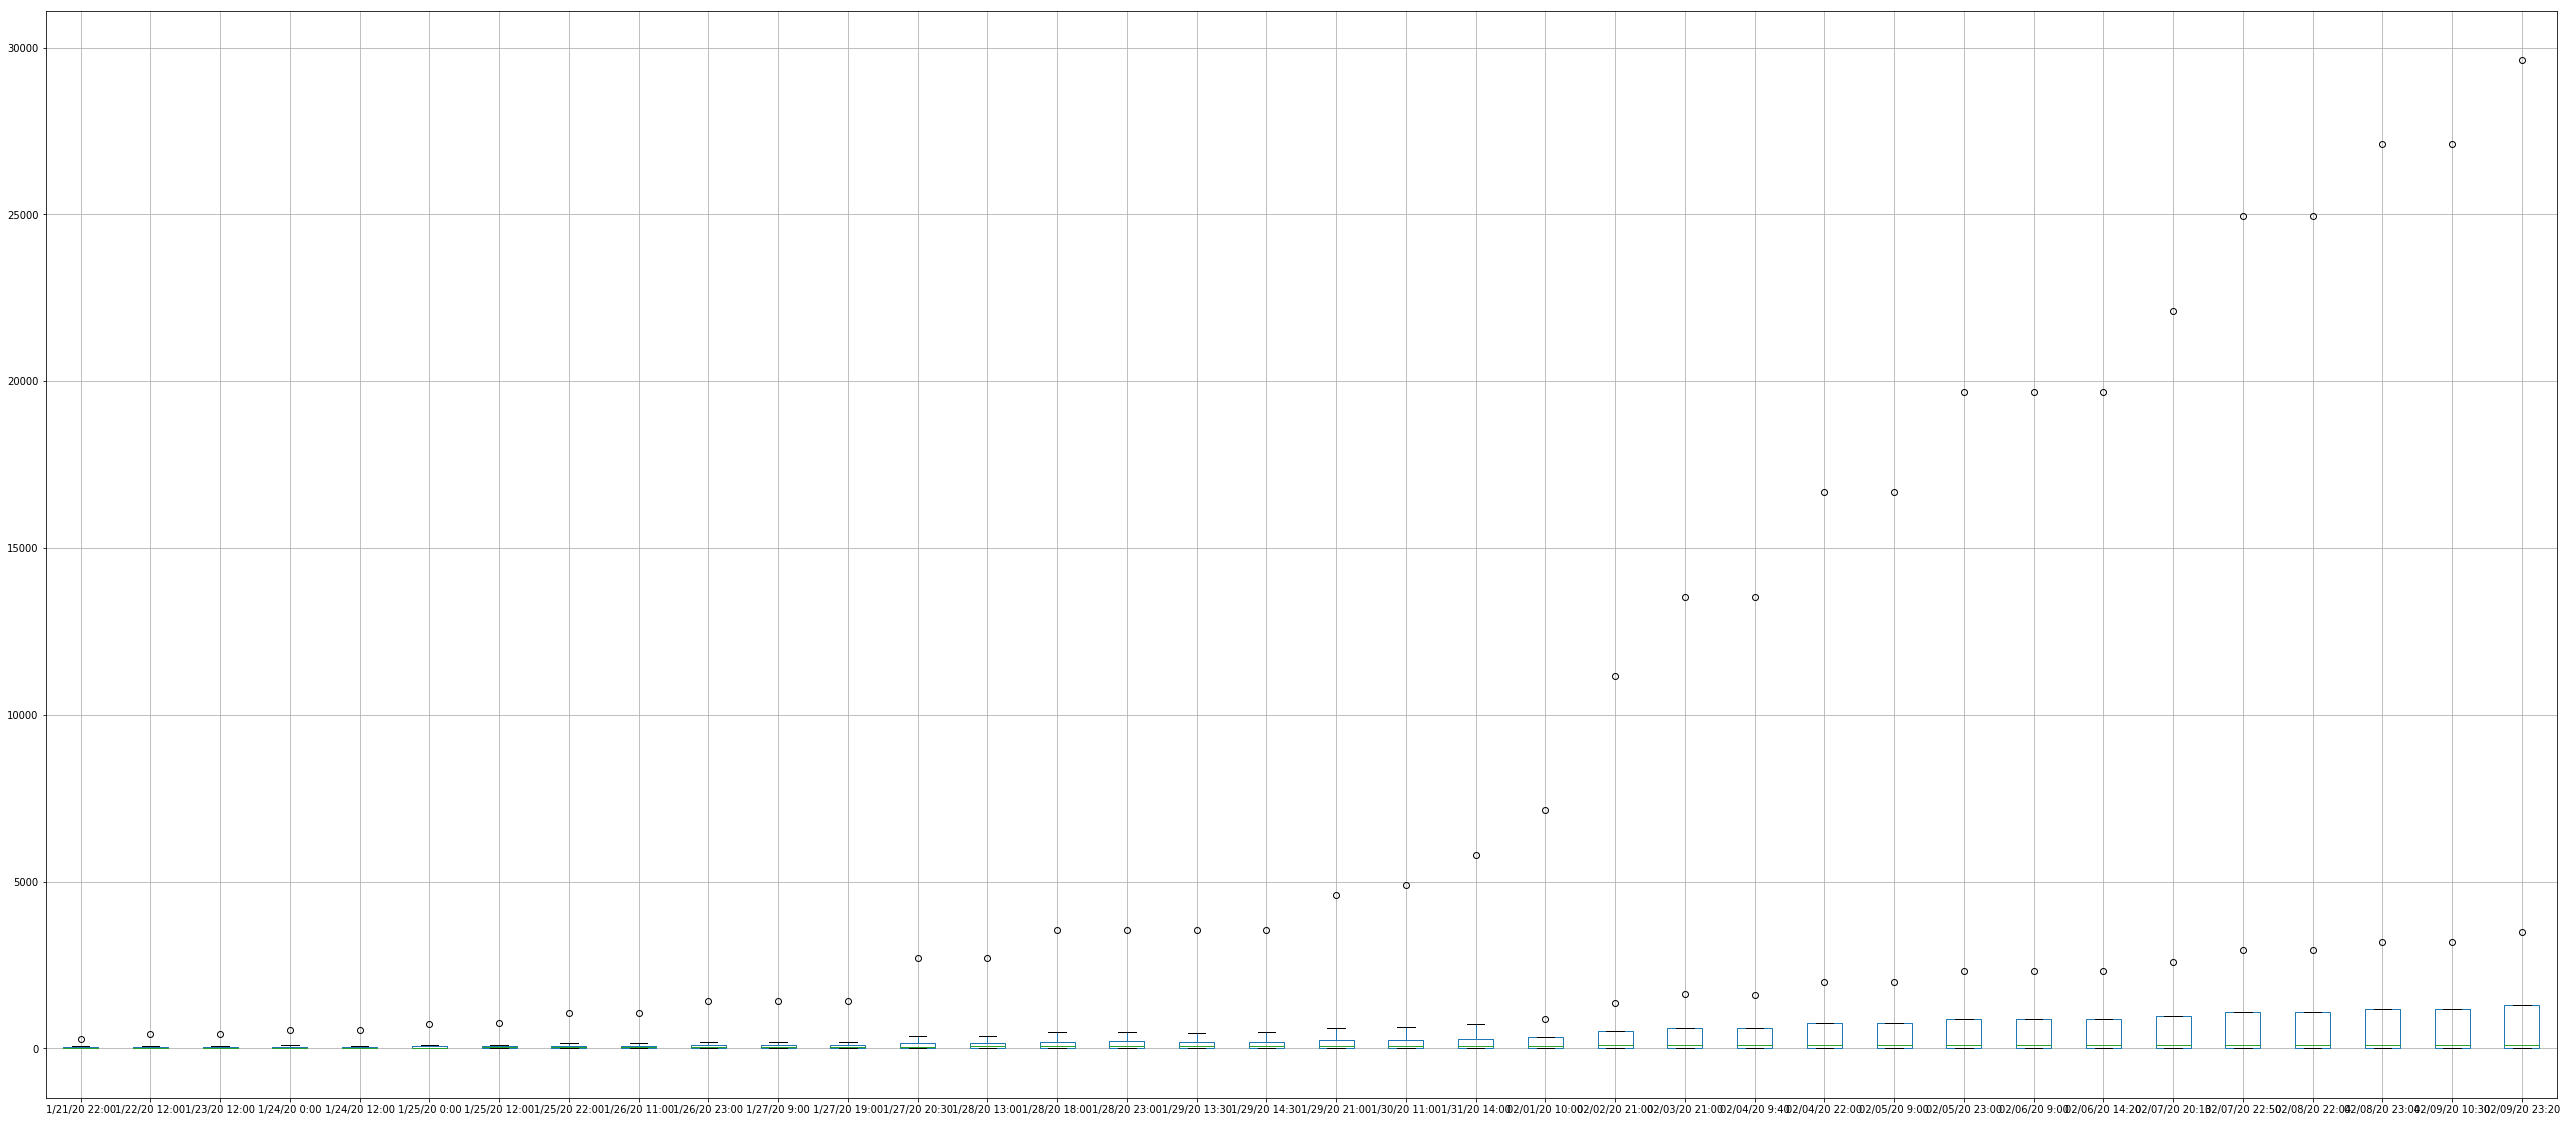

In [21]:
confirmed_data[confirmed_time_cols].describe().boxplot(figsize=(45,20))

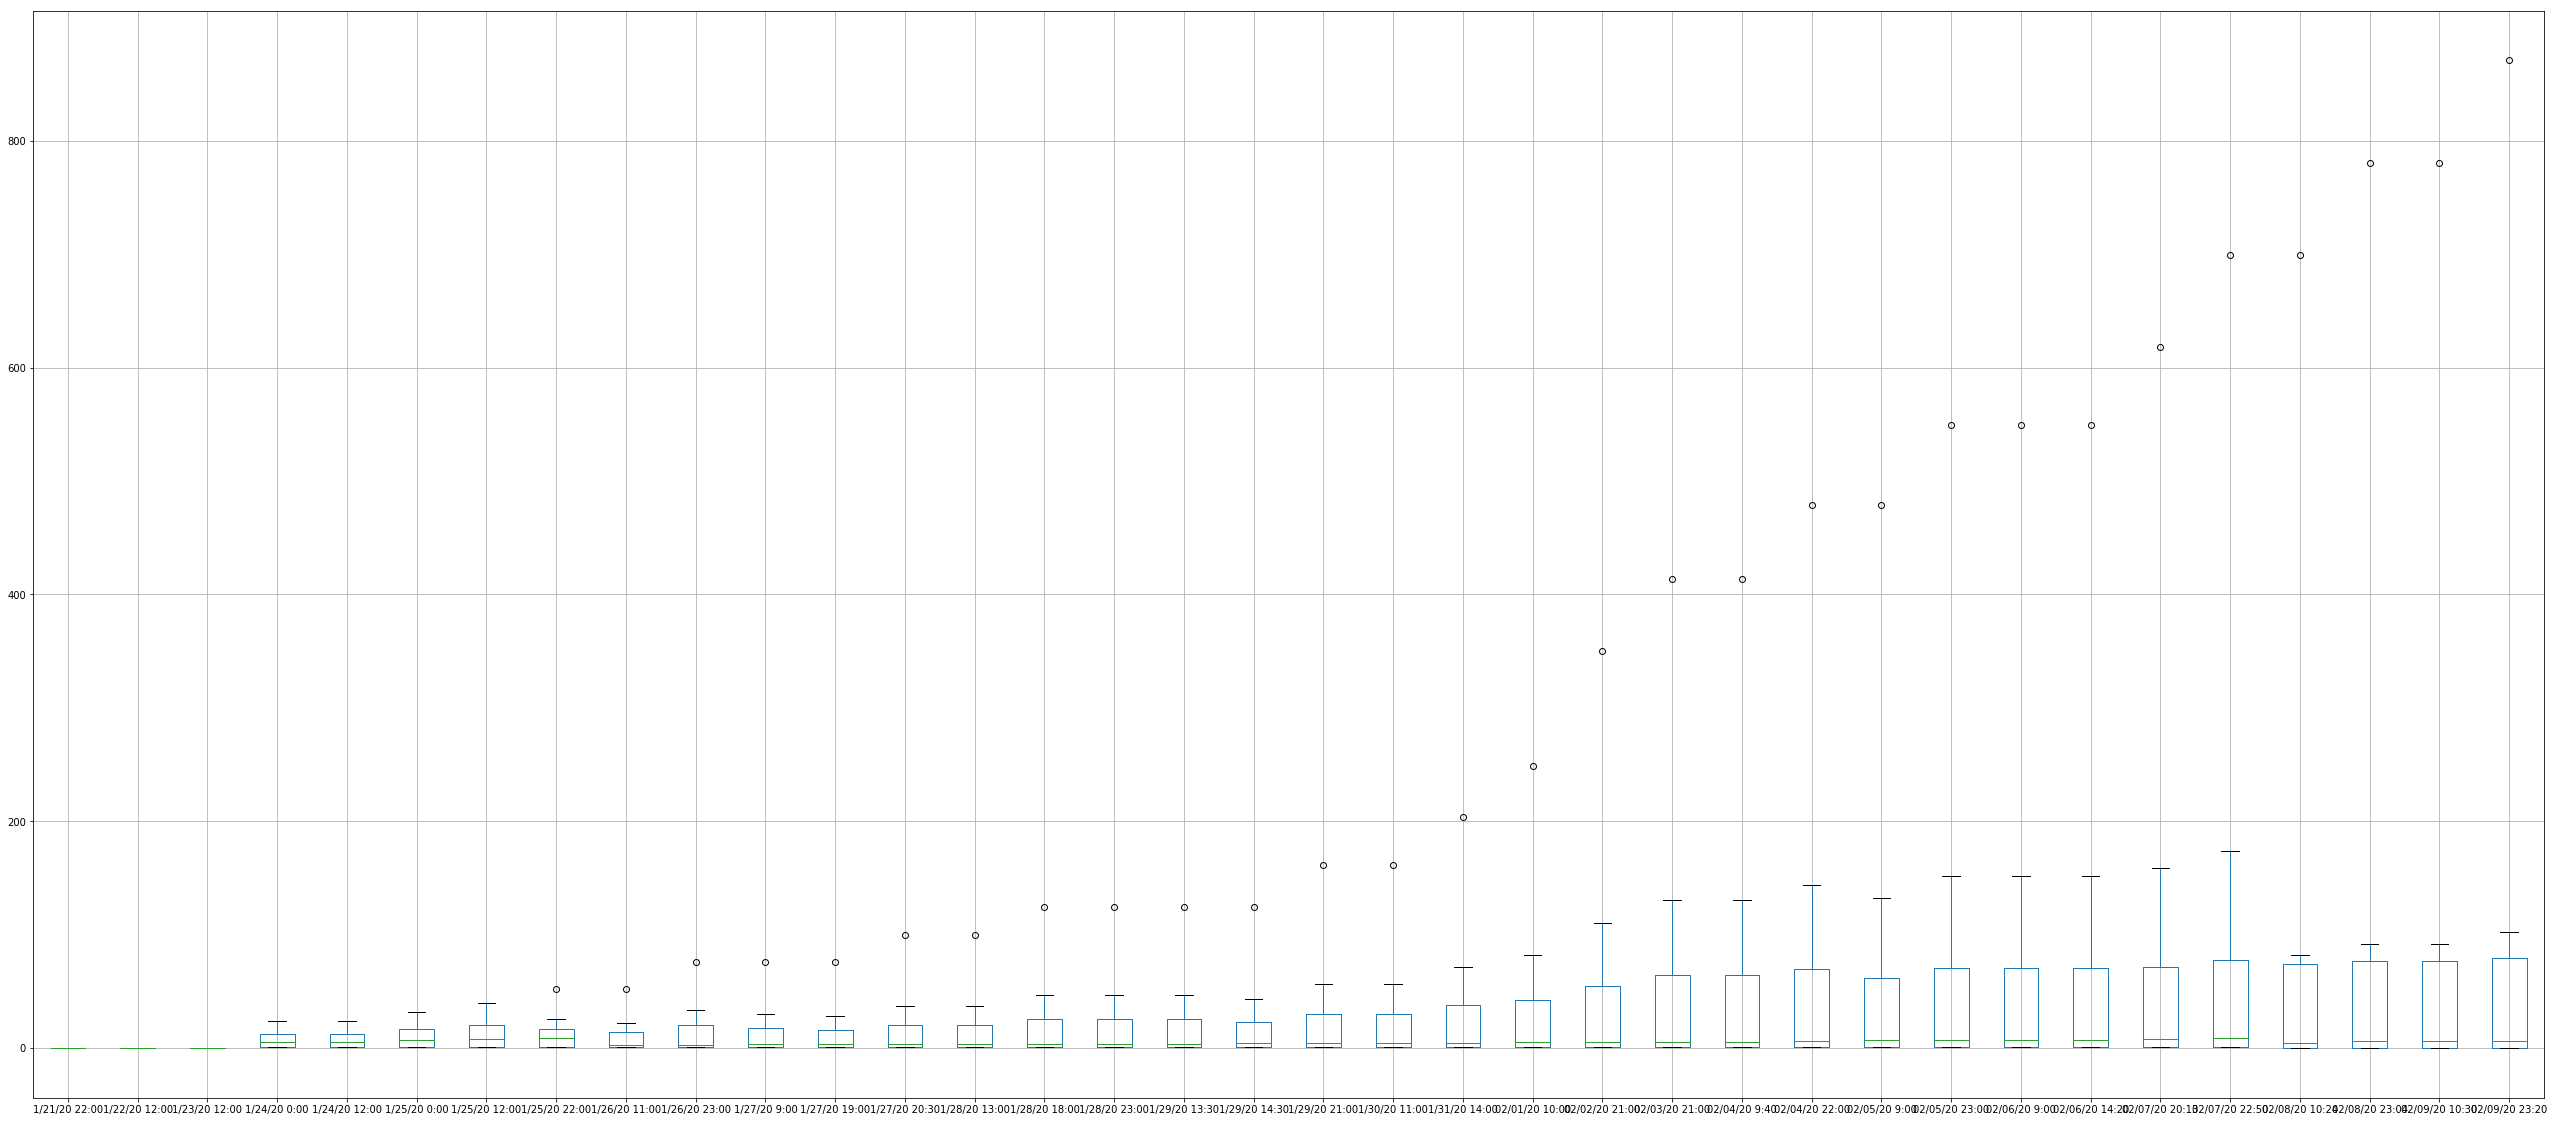

In [22]:
death_data[death_time_cols].describe().boxplot(figsize=(45,20))

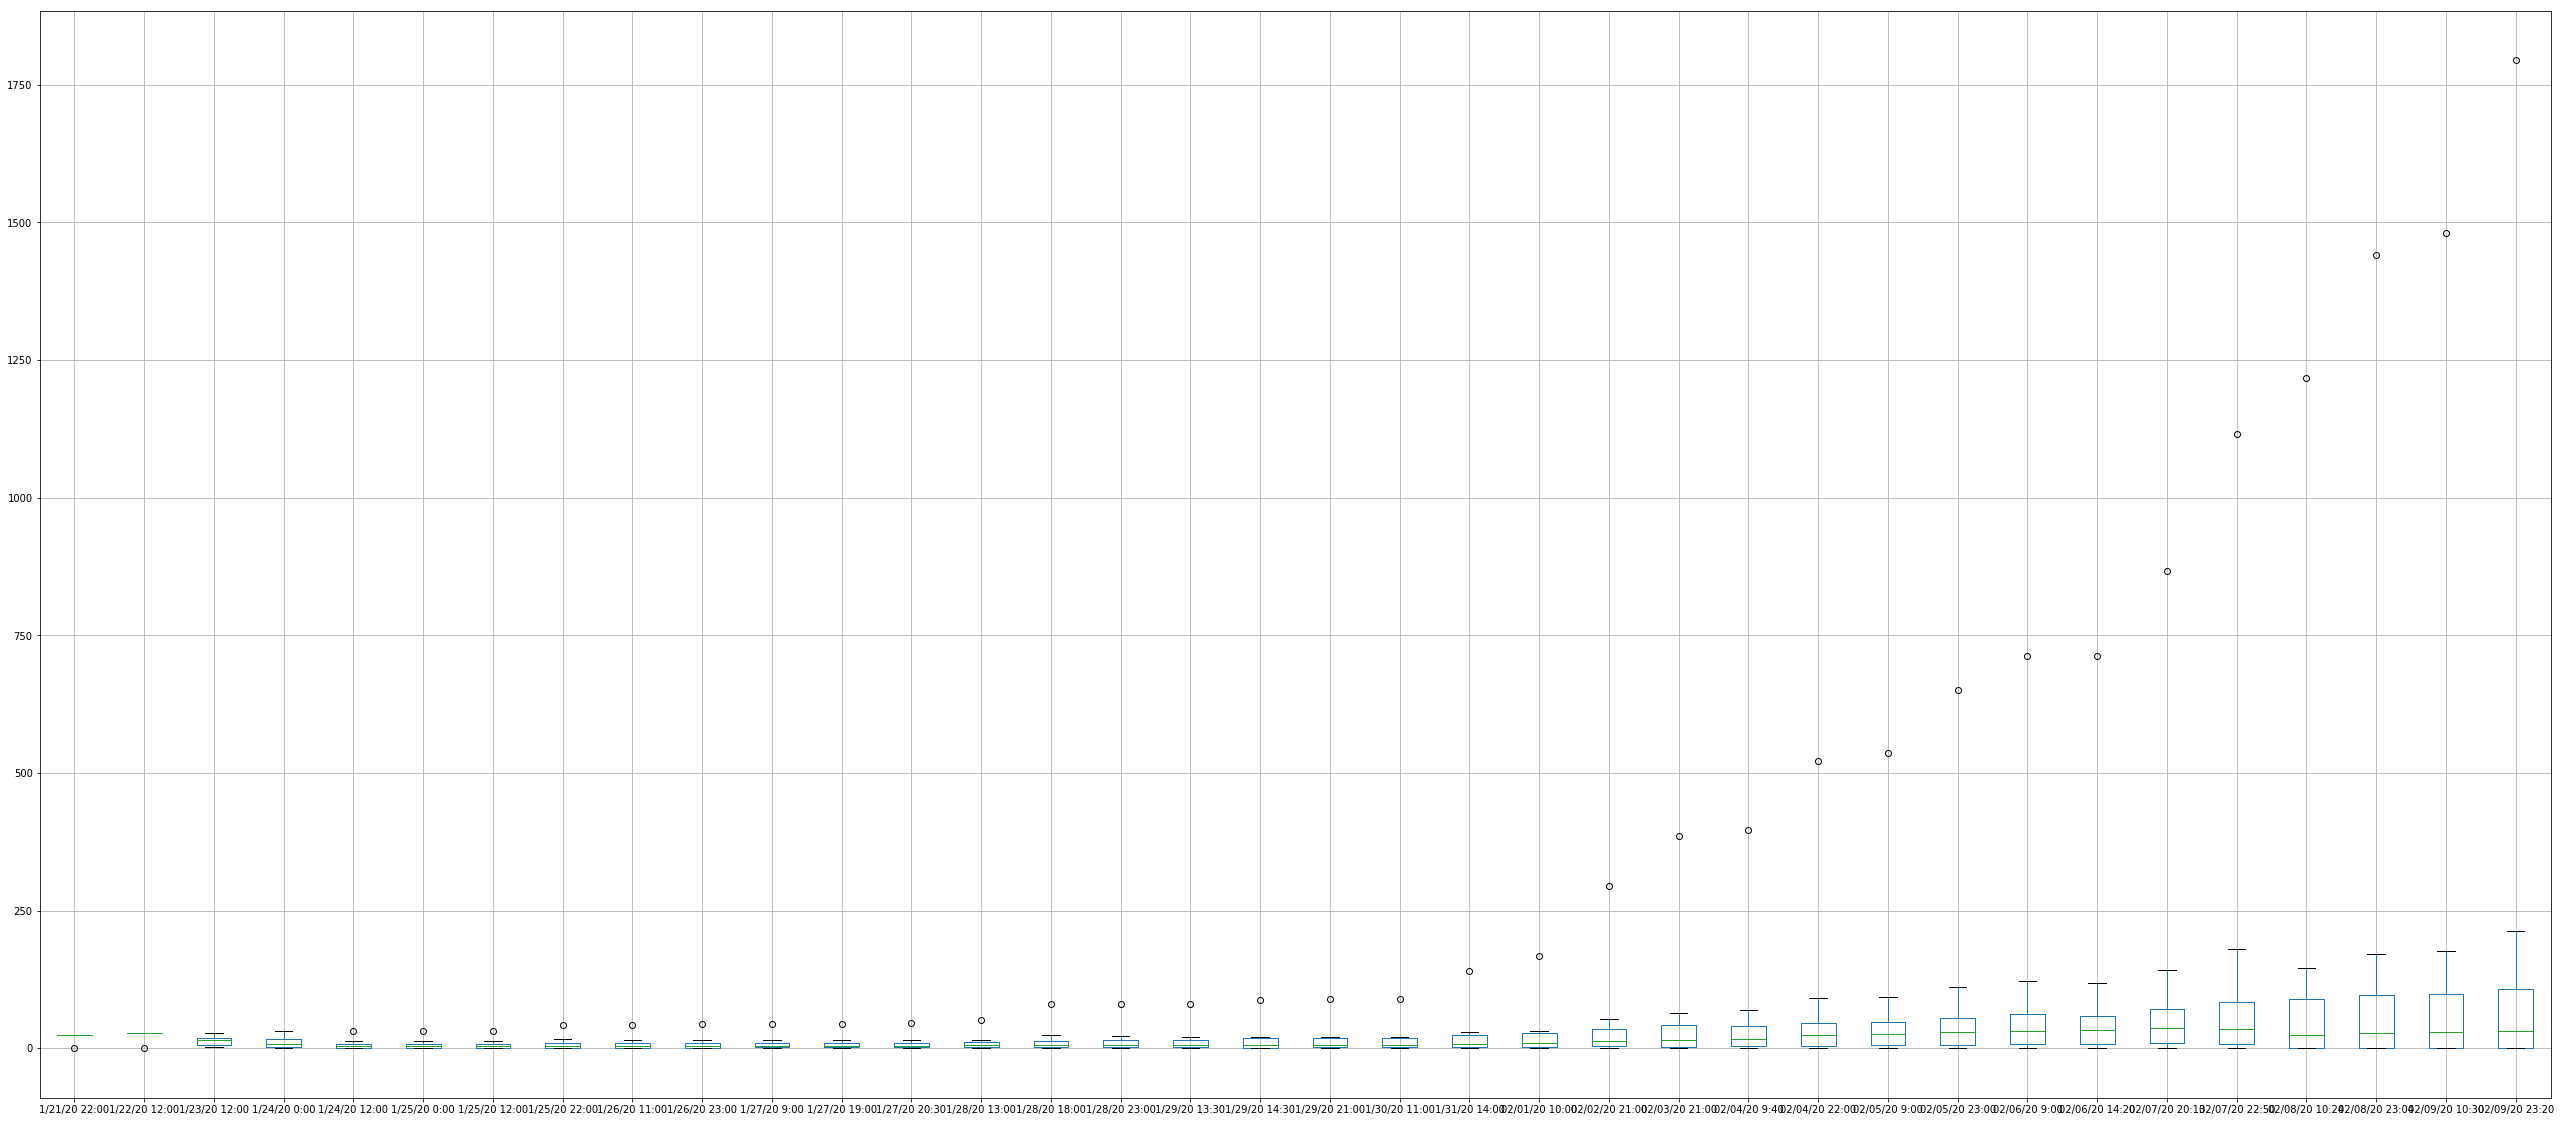

In [23]:
recovered_data[recovered_time_cols].describe().boxplot(figsize=(45,20))

## 中国/China 

In [24]:
China = data_latest[data_latest['Country']=='China']
China.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,
1494,2020-02-15 22:00:00,Hubei,China,2020-02-15T23:13:05,56249.0,1596.0,5623.0,2020-02-15 22:00:00
1495,2020-02-15 22:00:00,Guangdong,China,2020-02-15T14:03:04,1294.0,2.0,410.0,2020-02-15 22:00:00
1496,2020-02-15 22:00:00,Henan,China,2020-02-15T12:13:08,1212.0,13.0,391.0,2020-02-15 22:00:00
1497,2020-02-15 22:00:00,Zhejiang,China,2020-02-15T11:23:17,1162.0,0.0,428.0,2020-02-15 22:00:00
1498,2020-02-15 22:00:00,Hunan,China,2020-02-15T13:03:04,1001.0,2.0,425.0,2020-02-15 22:00:00


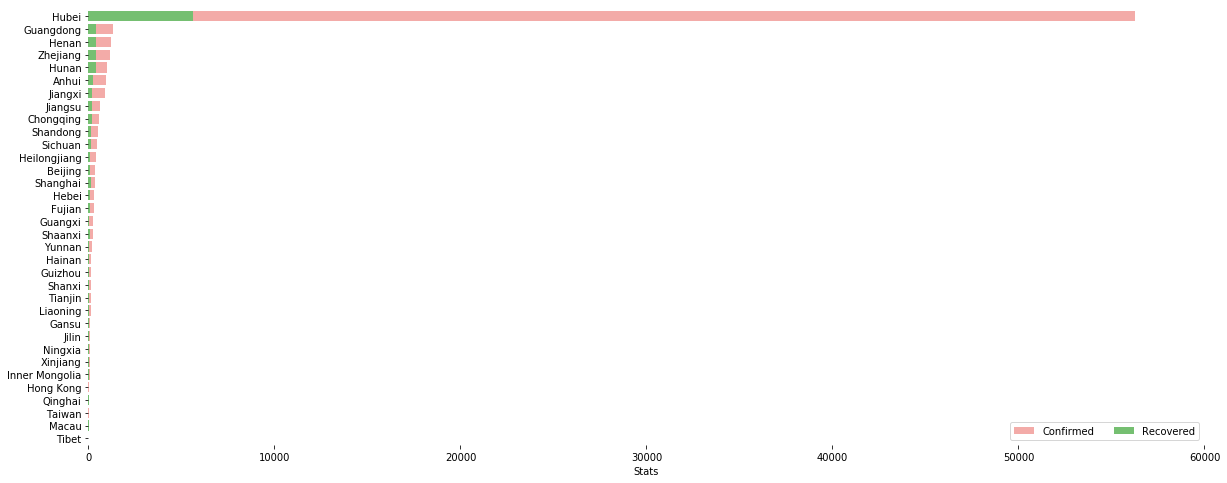

In [25]:
f, ax = plt.subplots(figsize=(20, 8))

sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Province/State", data=China[0:],
            label="Confirmed", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Province/State", data=China[0:],
            label="Recovered", color="g")


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 60000), ylabel="",
       xlabel="Stats")
sns.despine(left=True, bottom=True)

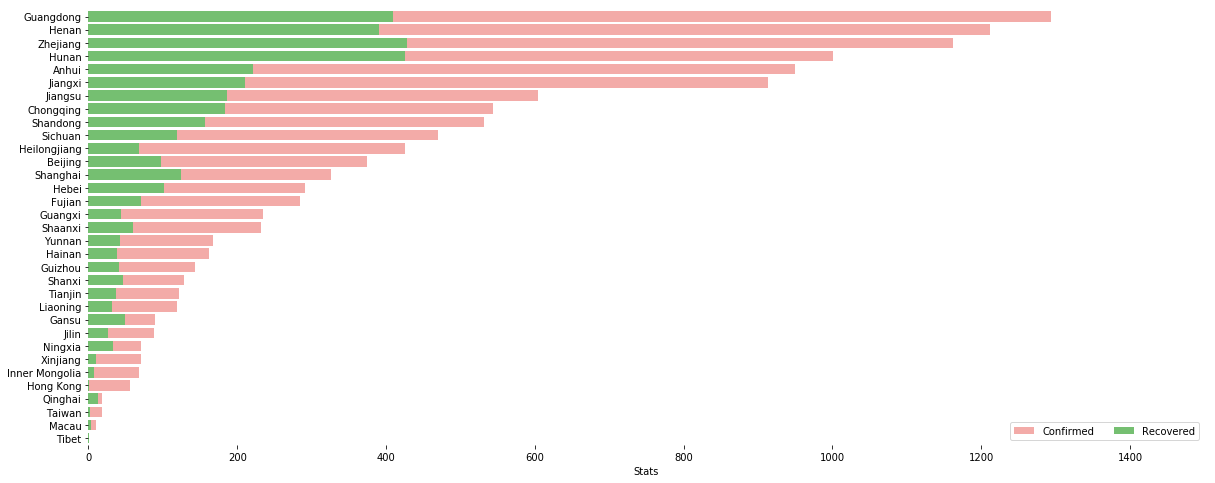

In [26]:
f, ax = plt.subplots(figsize=(20, 8))

sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Province/State", data=China[1:],
            label="Confirmed", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Province/State", data=China[1:],
            label="Recovered", color="g")


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1500), ylabel="",
       xlabel="Stats")
sns.despine(left=True, bottom=True)

## 除了中国之外的/Other than China 

In [27]:
df = pd.read_csv('./Data/2019_nCoV_data.csv')
df['Country'].replace({'Mainland China':'China','Hong Kong':'China',
                         'Macau':'China','Taiwan':'China'},inplace=True)
fig = px.bar(df[(df['Country'] != 'China') & (df['Country'] != 'Others')], 
             x="Confirmed", y="Country", orientation = 'h',animation_frame="Date", 
             hover_name="Country", range_x = [0,100], height = 800, color = 'Confirmed')
fig.update_layout(yaxis={'categoryorder':'total ascending'}, title = 'other than China')
fig.show()